<a href="https://colab.research.google.com/github/vishalkumar11/Spark-Foundation-/blob/master/spark_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2**
# **The Spark Foundation**
# **Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
url='http://bit.ly/w-data'
data_1=pd.read_csv(url)
print(data_1.head(15))
data_1=pd.DataFrame(data_1)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17


# **This plot represents the regression between Scores and Hours**

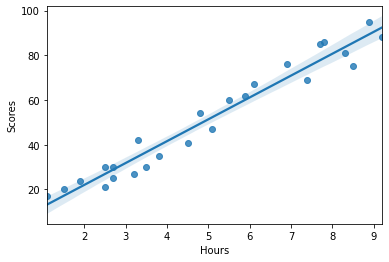

In [ ]:
import seaborn as sns
sns.regplot(x="Hours",y="Scores",data=data_1)

*Here We describe the mean, min and max of our dataset*

In [ ]:
data_1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


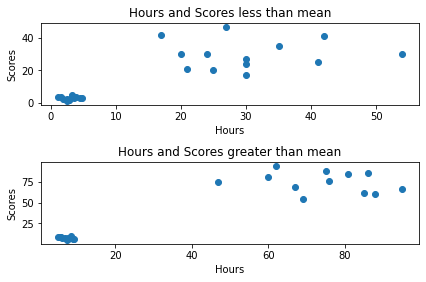

In [ ]:
fig,ax=plt.subplots(2)
ax[0].set_title("Hours and Scores less than mean")
ax[0].set_xlabel("Hours")
ax[0].set_ylabel("Scores")
ax[0].scatter(data_1[data_1["Hours"]<5.01],data_1[data_1["Scores"]<51.25])
ax[1].set_title("Hours and Scores greater than mean")
ax[1].set_xlabel("Hours")
ax[1].set_ylabel("Scores")
ax[1].scatter(data_1[data_1["Hours"]>5.01],data_1[data_1["Scores"]>51.25])
fig.tight_layout(pad=1)

# **Getting Data Ready** 

*Here we have to divide the data, and create inputs for training it...*

In [ ]:
X= data_1.iloc[:,:-1].values
y =data_1.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Training the algorithm**

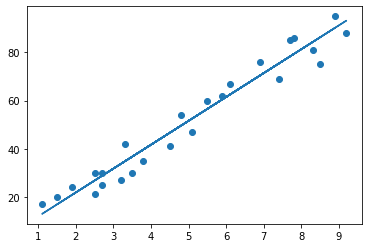

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)
plotting=reg.coef_*X+reg.intercept_
plt.scatter(X,y)
plt.plot(X, plotting)
plt.show()

**Make Predictions**

In [ ]:
print(X_test)
y_predict=reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


*Comparing Predicted vs Actual*

In [ ]:
data_2=pd.DataFrame({'Actual':y_test, 'Predict':y_predict})
data_2

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


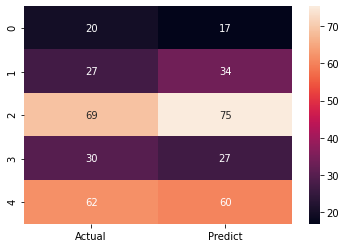

In [ ]:
sns.heatmap(data_2,annot=True)

**Predicted score for Hours(9.25)**

In [ ]:
Hours_given  = 9.25
own_prediction = reg.predict([[Hours_given]])
print("No of Hours = {}".format([[Hours_given]]))
print("Predicted Score = {}".format(own_prediction[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


Next, we **Evaluate the model**

*The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.*

In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error:' , metrics.mean_squared_error(y_test,y_predict))
print("Explained Variance Score:", metrics.explained_variance_score(y_test,y_predict))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Explained Variance Score: 0.9482829156738145
